In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt
import scipy.stats as sts
from matplotlib import cm

In [33]:
def gauss(x, mean, std_dev, amp):
    exponent = -(1/2) * np.power(((x - mean) / std_dev), 2)
    coefficient = 1 / (std_dev * np.sqrt(2 * np.pi))
    pdf = coefficient * np.exp(exponent)
    return amp * pdf

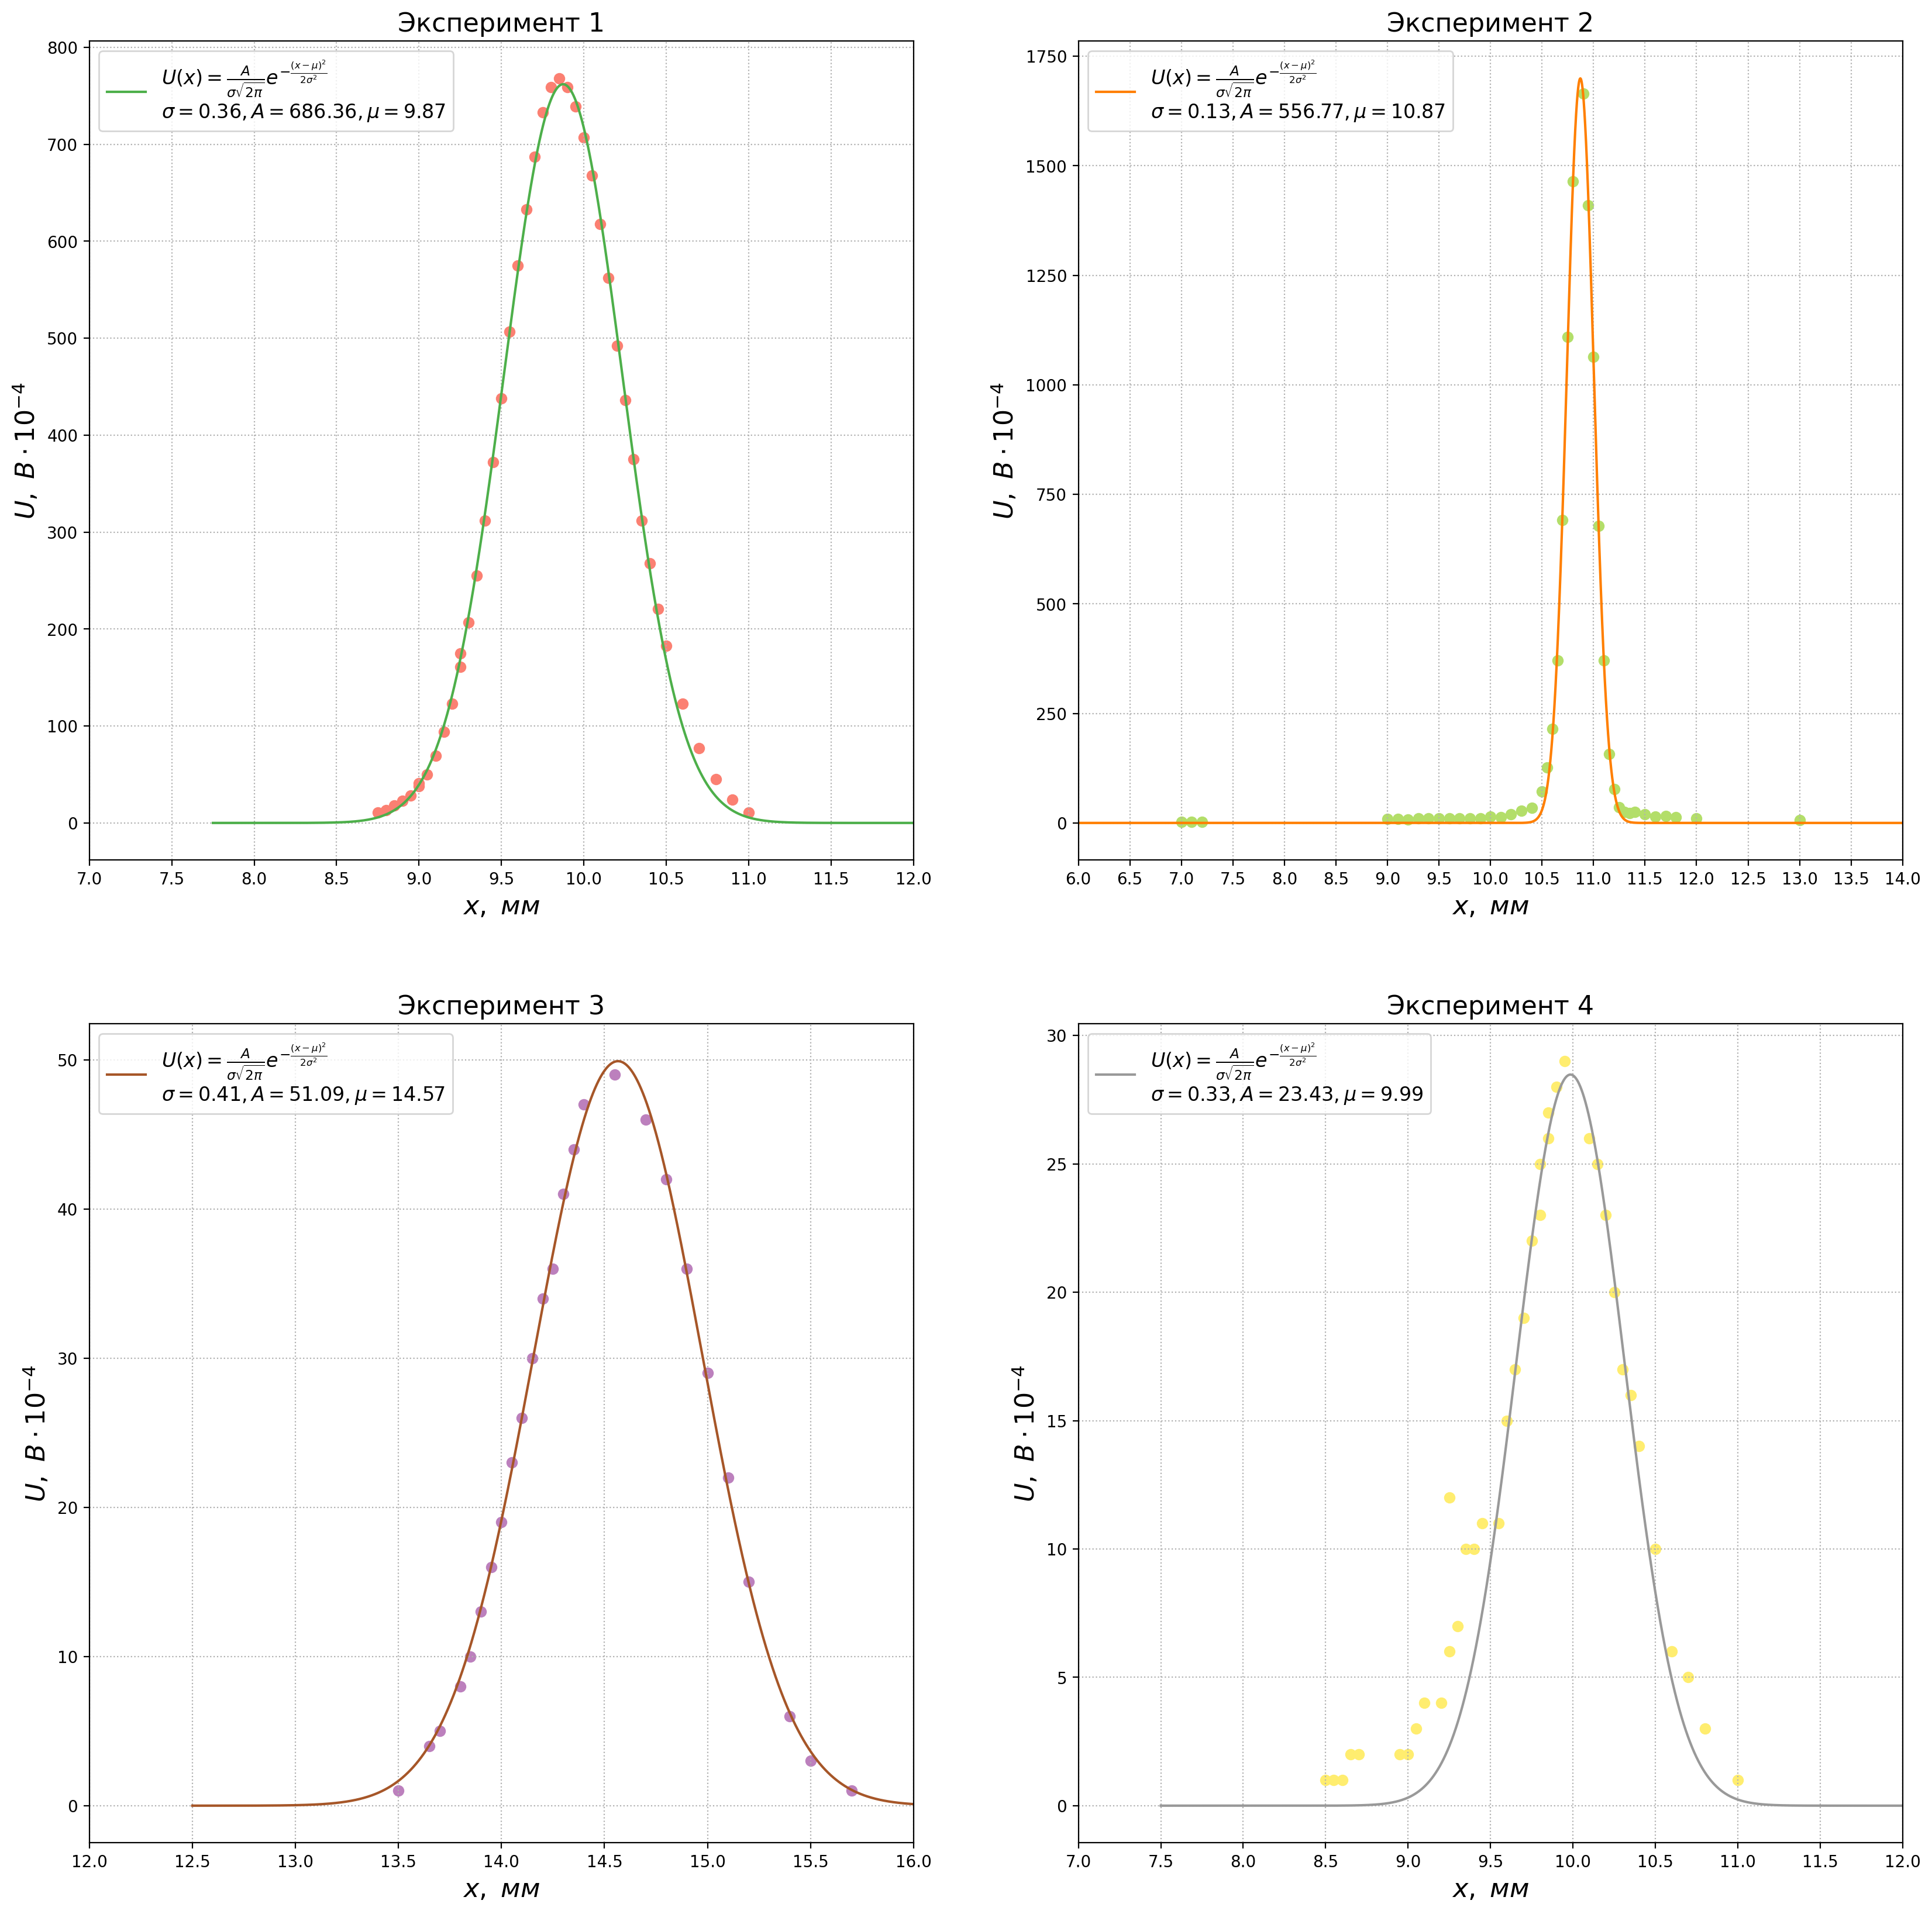

In [123]:
fig, ax = plt.subplots(2, 2, figsize = (20, 20), dpi = 200)
table_names = np.arange(4) + 1
po_values = [[9.8, 0.5, 800], 
             [9.8, 0.5, 800], 
             [9.8, 0.5, 800], 
             [10, 0.3, 30]]
ranges = [(-np.inf, np.inf), 
          (-np.inf, np.inf), 
          (-np.inf, np.inf), 
          (9.5, 10.5)]

w_values = []
for plotable, table, po, rang in zip(ax.ravel(), table_names, po_values, ranges):
    data = pd.read_csv(f"{table}.csv")
    x_line = np.linspace(np.min(data.y) - 1, np.max(data.y) + 1, 1000000)
    mask = (data['y'] > rang[0]) * (data['y'] < rang[1])
    param, _ = opt.curve_fit(gauss, data['y'][mask], data['U'][mask], p0 = po)
    gauss_line = gauss(x_line, *param)
    plotable.plot(x_line, 
                  gauss(x_line, *param), 
                  color = cm.Set1(table / 4),
                  label = r"$U(x) = \frac{A}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$" + f"\n$\sigma = {param[1]:.2f}, A = {param[2]:.2f}, \mu = {param[0]:.2f}$")
    plotable.scatter(data.y, data.U, color = cm.Set3(table / 4))
    plotable.grid(ls = ':')
    plotable.set_title(f"Эксперимент {table}", fontsize = 16)
    plotable.legend(fontsize = 12, loc = 'upper left')
    plotable.set_xlabel("$x, \ мм$", fontsize = 16)
    plotable.set_ylabel("$U, \ В \cdot 10^{-4}$", fontsize = 16)
    plotable.set_xticks(np.arange(int(np.min(data.y) - 1), int(np.max(data.y) + 1) + 0.25, 0.5))
    plotable.set_xlim(int(np.min(data.y) - 1), int(np.max(data.y) + 1))

/tmp/ipykernel_67598/1787751162.py:11: RuntimeWarning: divide by zero encountered in divide
  np.power(sigma_1, 2) + np.power(lambda_1 / (np.pi * sigma_1 * f_values), 2) - 2 * l1 * np.power(sigma_1, 2) / f_values + np.power(l1 * sigma_1 / f_values, 2),
/tmp/ipykernel_67598/1787751162.py:11: RuntimeWarning: invalid value encountered in subtract
  np.power(sigma_1, 2) + np.power(lambda_1 / (np.pi * sigma_1 * f_values), 2) - 2 * l1 * np.power(sigma_1, 2) / f_values + np.power(l1 * sigma_1 / f_values, 2),


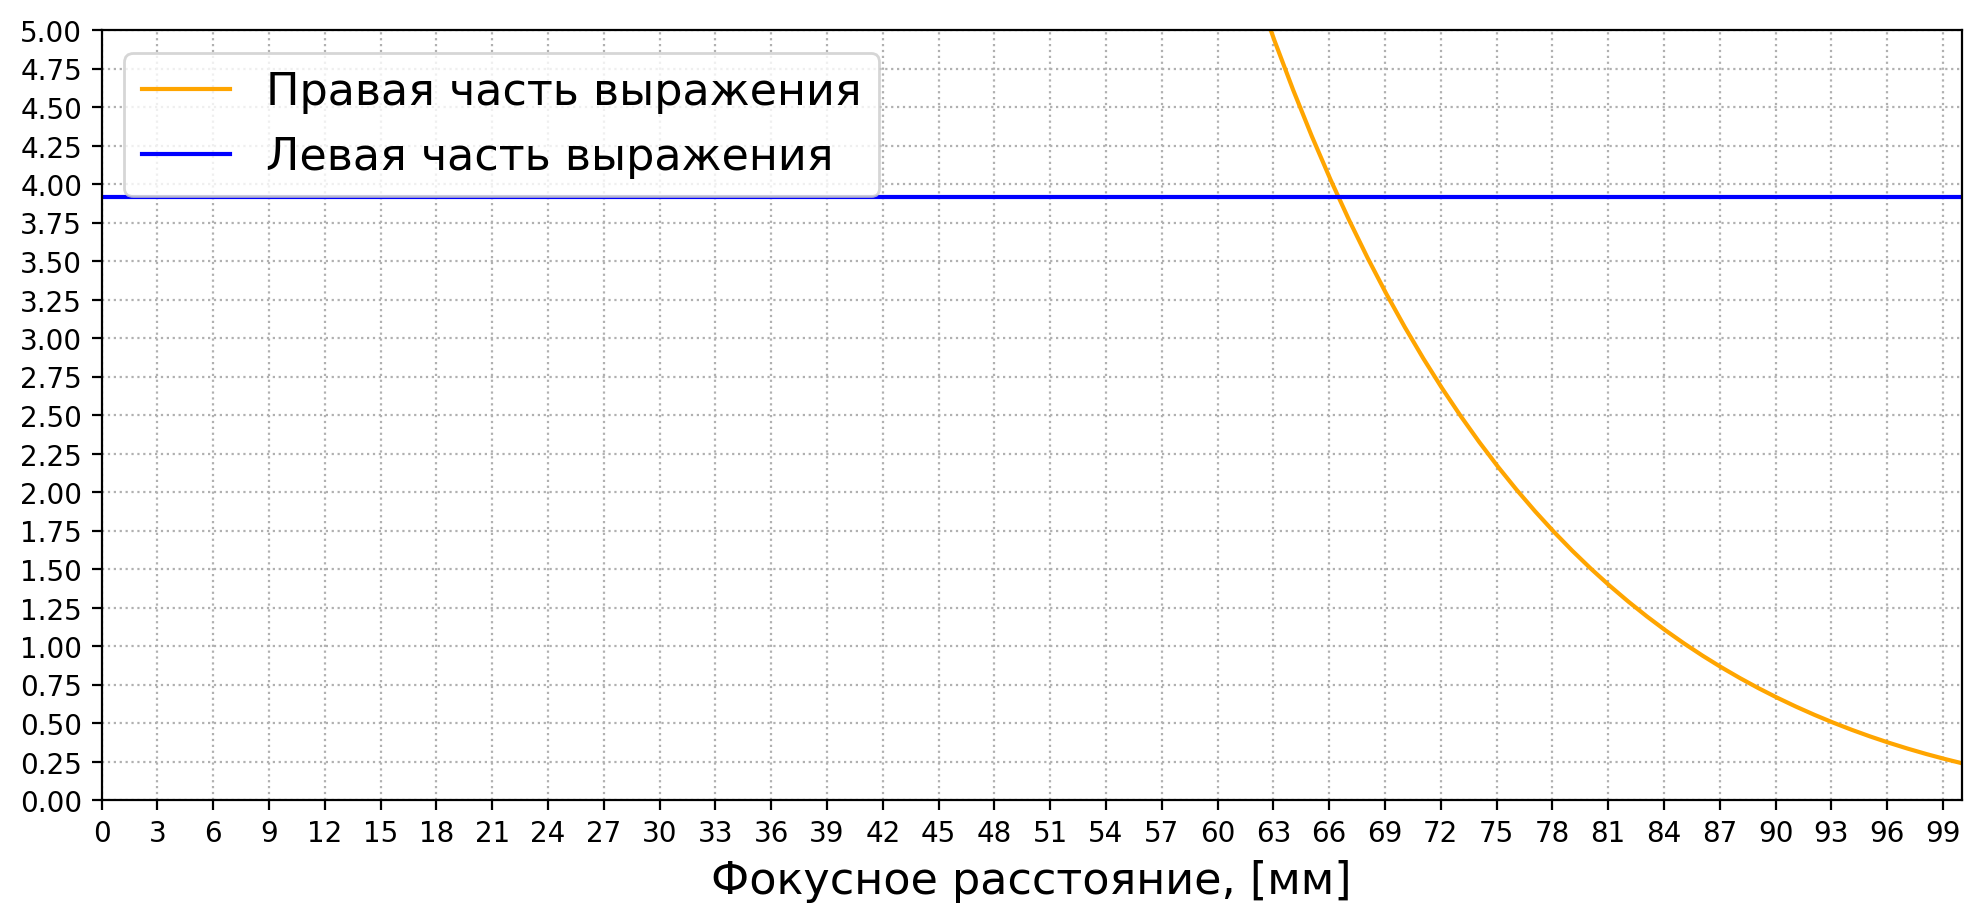

In [156]:
lambda_1 = 400 * 1e-6
sigma_1 = 0.41 * 6
sigma_2 = 0.33 * 6
l1 = 12 * 10
l2 = 121 * 10

f_values = np.linspace(0, 1000, 1000)

plt.figure(figsize = (12, 5), dpi = 200)
plt.plot(f_values, 
         np.power(sigma_1, 2) + np.power(lambda_1 / (np.pi * sigma_1 * f_values), 2) - 2 * l1 * np.power(sigma_1, 2) / f_values + np.power(l1 * sigma_1 / f_values, 2), 
         color = 'orange',
         label = 'Правая часть выражения')
plt.axhline(np.power(sigma_2, 2), color = 'blue', label = 'Левая часть выражения')
plt.yticks(np.arange(-5, 6, 0.25))
plt.ylim(0, 5)
plt.xticks(np.arange(0, 500, 3))
plt.xlim(0, 100)
plt.grid(ls = ':')
plt.xlabel("Фокусное расстояние, [мм]", fontsize = 16)
plt.legend(fontsize = 16)

In [46]:
import sympy as smp

In [79]:
A, B, C, D = smp.symbols("A B C D", real = True)
f, l1, l2 = smp.symbols("f l_1 l_2", real = True, positive = True)
A = 1 - l2 / f
B = l1 + l2 - l1 * l2 / f
C = -1 / f
D = 1 - l1 / f
lam = smp.symbols(r"\lambda", real = True)
R_1, R_2 = smp.symbols("R_1 R_2", real = True)
w_1, w_2 = smp.symbols(r"w_1 w_2", real = True)

q_1 = 1 / R_1 - smp.I * lam / (smp.pi * w_1 ** 2)
q_2 = 1 / R_2 - smp.I * lam / (smp.pi * w_2 ** 2)

eq = q_2 - (A * q_1 + B) / (C * q_1 + D)
eq

-I*\lambda/(pi*w_2**2) - (l_1 + l_2 + (1 - l_2/f)*(-I*\lambda/(pi*w_1**2) + 1/R_1) - l_1*l_2/f)/(1 - l_1/f - (-I*\lambda/(pi*w_1**2) + 1/R_1)/f) + 1/R_2

In [135]:
w_2_sq = smp.solve(eq, w_2 ** 2)[w_2 ** 2]
w_2_sq

\lambda**2/(pi**2*f**2*w_1**2) + w_1**2 - 2*l_1*w_1**2/f + l_1**2*w_1**2/f**2 - 2*w_1**2/(R_1*f) + 2*l_1*w_1**2/(R_1*f**2) + w_1**2/(R_1**2*f**2)

In [81]:
smp.print_latex(w_2_sq)

\frac{\lambda^{2}}{\pi^{2} f^{2} w_{1}^{2}} + w_{1}^{2} - \frac{2 l_{1} w_{1}^{2}}{f} + \frac{l_{1}^{2} w_{1}^{2}}{f^{2}} - \frac{2 w_{1}^{2}}{R_{1} f} + \frac{2 l_{1} w_{1}^{2}}{R_{1} f^{2}} + \frac{w_{1}^{2}}{R_{1}^{2} f^{2}}


In [74]:
smp.print_latex(eq)

- \frac{i \lambda}{\pi w_{2}^{2}} - \frac{A \left(- \frac{i \lambda}{\pi w_{1}^{2}} + \frac{1}{R_{1}}\right) + B}{C \left(- \frac{i \lambda}{\pi w_{1}^{2}} + \frac{1}{R_{1}}\right) + D} + \frac{1}{R_{2}}
